Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
lat, lon = 26.4332,-81.401
year = 2010
api_key = 'OjVCw5oOv4BRmcldYUf4RIQrWrgIfbRMXISJubzX'
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,wind_speed,cloud_type,fill_flag,relative_humidity,surface_albedo,surface_pressure,wind_direction,dew_point'

leap_year = 'false'
interval = '30'
utc = 'true'
your_name = 'John+Smith'
reason_for_use = 'beta+testing'
your_affiliation = 'my+institution'

your_email = 'matthewlsessions@gmail.com'
mailing_list = 'true'

import pandas as pd

year = '2010'

df1 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df1 = df1.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))


year = '2011'

df2 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df2 = df2.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df2])

In [75]:
df1.GHI.sum()

7718239

In [76]:
df1.GHI.sum()

7718239

In [0]:

year = '2012'
leap_year = 'true'
dfl = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


dfl = dfl.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

df1 = pd.concat([df1,dfl])

In [0]:
year = '2013'

leap_year = 'false'
df3 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df3 = df3.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df3])

In [0]:
year = '2014'

df4 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df4 = df4.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df4])

In [80]:
df1.tail(10)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2014-12-31 19:00:00,2014,12,31,19,0,491,222,460,1.8,25,54.20,3,0,73.24,0.155,1010.0,7.6,19
2014-12-31 19:30:00,2014,12,31,19,30,302,244,107,1.8,25,57.53,3,0,73.24,0.155,1010.0,7.6,19
2014-12-31 20:00:00,2014,12,31,20,0,163,161,3,1.8,25,61.54,3,0,72.93,0.155,1010.0,6.0,19
2014-12-31 20:30:00,2014,12,31,20,30,214,173,100,1.7,24,66.10,3,0,77.42,0.155,1010.0,6.0,19
2014-12-31 21:00:00,2014,12,31,21,0,92,92,0,1.6,24,71.10,3,0,78.82,0.155,1010.0,7.0,20
2014-12-31 21:30:00,2014,12,31,21,30,44,44,0,1.3,23,76.47,3,0,83.71,0.155,1020.0,7.0,20
2014-12-31 22:00:00,2014,12,31,22,0,89,47,304,1.1,22,82.12,1,0,90.45,0.155,1020.0,10.6,20
2014-12-31 22:30:00,2014,12,31,22,30,17,15,67,1.3,21,87.99,0,0,96.15,0.155,1020.0,10.6,20
2014-12-31 23:00:00,2014,12,31,23,0,0,0,0,1.6,21,94.06,3,0,94.93,0.155,1020.0,18.7,20
2014-12-31 23:30:00,2014,12,31,23,30,0,0,0,1.6,21,100.27,3,0,94.93,0.155,1020.0,18.7,20


In [81]:
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2014-12-31 21:30:00,2014,12,31,21,30,44,44,0,1.3,23,76.47,3,0,83.71,0.155,1020.0,7.0,20
2014-12-31 22:00:00,2014,12,31,22,0,89,47,304,1.1,22,82.12,1,0,90.45,0.155,1020.0,10.6,20
2014-12-31 22:30:00,2014,12,31,22,30,17,15,67,1.3,21,87.99,0,0,96.15,0.155,1020.0,10.6,20
2014-12-31 23:00:00,2014,12,31,23,0,0,0,0,1.6,21,94.06,3,0,94.93,0.155,1020.0,18.7,20
2014-12-31 23:30:00,2014,12,31,23,30,0,0,0,1.6,21,100.27,3,0,94.93,0.155,1020.0,18.7,20


In [82]:
year = 2015

df5 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df5 = df5.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df5])
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 21:30:00,2015,12,31,21,30,129,89,167,1.0,27,76.50,3,0,74.56,0.147,1010.0,178.3,22
2015-12-31 22:00:00,2015,12,31,22,0,63,51,87,0.7,26,82.15,7,4,81.76,0.147,1010.0,181.2,22
2015-12-31 22:30:00,2015,12,31,22,30,12,12,0,0.6,25,88.03,8,4,86.77,0.147,1010.0,181.2,22
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.6,25,94.09,8,0,84.97,0.147,1010.0,174.5,22
2015-12-31 23:30:00,2015,12,31,23,30,0,0,0,0.6,25,100.30,7,0,84.97,0.147,1010.0,174.5,22


In [83]:
!pip install pysolar

In [84]:
from pysolar.solar import *

date = datetime.datetime(2015, 12, 31, 23, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -75.19042969, date)

98.64295895125696

In [0]:
year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [182]:
test.head(3)

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2016-01-01 00:00:00,2016,1,1,0,0,0,0,0,0.6,25,106.64,8,0,85.75,0.155,1010.0,165.0,22
2016-01-01 00:30:00,2016,1,1,0,30,0,0,0,0.6,24,113.07,8,0,91.03,0.155,1010.0,165.0,22
2016-01-01 01:00:00,2016,1,1,1,0,0,0,0,0.6,24,119.58,8,0,91.56,0.155,1010.0,154.8,22


In [0]:
dist = df1.copy()

In [0]:
dist = dist[dist.GHI > 40]

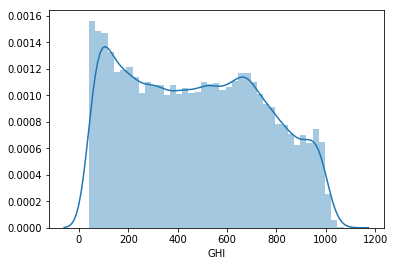

In [89]:
import seaborn as sns

sns.distplot(dist.GHI)

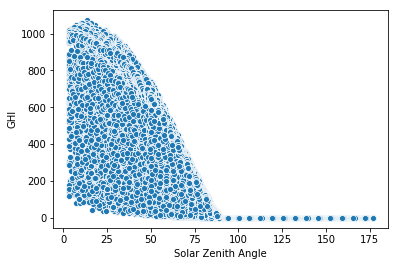

In [90]:
sns.scatterplot(x=df1['Solar Zenith Angle'],y=df1.GHI, data=df1)

In [0]:
features = ['Wind Speed','Temperature','Solar Zenith Angle','Pressure','Surface Albedo']
target = 'GHI'

In [0]:
from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)


In [93]:
boost.fit(df1[features],df1[target])


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [95]:
y_pred_train = boost.predict(df1[features])

print(r2_score(df1[target],y_pred_train))
print(mean_absolute_error(df1[target],y_pred_train))

0.8753781807103351
55.06734826156486


In [96]:
y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8675882014917855
55.52386579931441


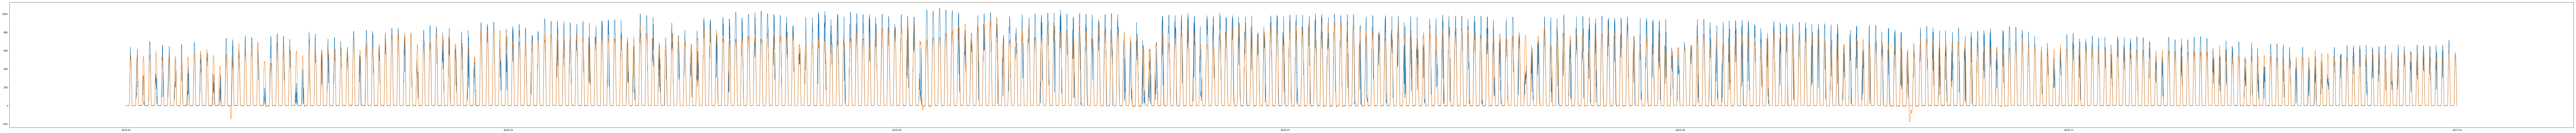

In [97]:
import matplotlib.pyplot as plt
import numpy as np

f = plt.figure(figsize=(200,10))
plt.plot(test.index,test.GHI)
plt.plot(test.index,y_pred_test)

In [29]:
pip install eli5

     |████████████████████████████████| 112kB 2.9MB/s 


In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    boost,
    scoring='r2', 
    n_iter=2, 
    random_state=42
)

In [34]:
permuter.fit(df1[features], df1[target])


eli5.show_weights(
    permuter, 
    top=None,
    feature_names=features
)

Weight,Feature
1.3907 ± 0.0072,Solar Zenith Angle
0.0490 ± 0.0000,Temperature
0.0047 ± 0.0001,Wind Speed
0.0023 ± 0.0001,Surface Albedo
0.0000 ± 0.0000,Pressure


In [0]:
lat, lon = 25.825, -80.475

year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [36]:
y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

0.8116316220301021
76.83781776030315


In [39]:
df1.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,0.1,18,105.48,0,0,100.00,0.166,850.0,264.8,18
2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,0.1,17,112.38,0,0,100.00,0.166,850.0,264.8,18
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,0.1,17,119.27,0,0,99.69,0.166,860.0,251.1,17
2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,0.1,17,126.12,0,0,100.00,0.166,860.0,251.1,17
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,0.1,17,132.90,0,0,100.00,0.166,860.0,239.5,17


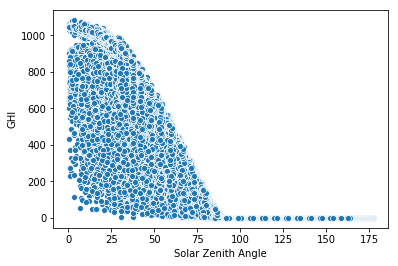

In [38]:
sns.scatterplot(x=df1['Solar Zenith Angle'],y=df1.GHI, data=df1)

In [0]:
high = df1[(df1['Solar Zenith Angle'] < 10) & (df1['Solar Zenith Angle'] > 9)]

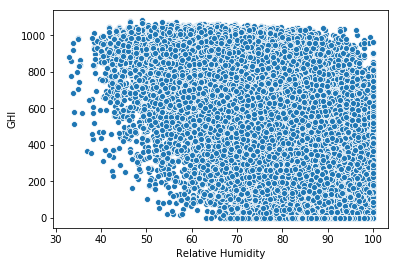

In [44]:
sns.scatterplot(x=df1['Relative Humidity'],y=df1.GHI, data=df1)

In [0]:
https://maps.nrel.gov/nsrdb-viewer/?aL=j0s5CD%255Bv%255D%3Dt%26v7bcnr%255Bv%255D%3Dt%26v7bcnr%255Bd%255D%3D1&bL=clight&cE=0&lR=0&mC=5.61598581915534%2C49.92187499999999&zL=2#

In [98]:
df1.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,1.0,19,106.57,4,0,86.10,0.149,1010.0,216.8,16
2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,1.0,18,113.01,4,0,91.66,0.149,1010.0,216.8,16
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,1.0,18,119.52,4,0,91.76,0.149,1010.0,211.7,16
2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,1.0,18,126.10,7,0,91.75,0.149,1010.0,211.7,16
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,1.0,18,132.73,7,0,91.96,0.149,1010.0,205.8,16


In [99]:
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 21:30:00,2015,12,31,21,30,129,89,167,1.0,27,76.50,3,0,74.56,0.147,1010.0,178.3,22
2015-12-31 22:00:00,2015,12,31,22,0,63,51,87,0.7,26,82.15,7,4,81.76,0.147,1010.0,181.2,22
2015-12-31 22:30:00,2015,12,31,22,30,12,12,0,0.6,25,88.03,8,4,86.77,0.147,1010.0,181.2,22
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.6,25,94.09,8,0,84.97,0.147,1010.0,174.5,22
2015-12-31 23:30:00,2015,12,31,23,30,0,0,0,0.6,25,100.30,7,0,84.97,0.147,1010.0,174.5,22


In [0]:
df = df1[df1.Minute == 0]

In [130]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,1.0,19,106.57,4,0,86.10,0.149,1010.0,216.8,16
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,1.0,18,119.52,4,0,91.76,0.149,1010.0,211.7,16
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,1.0,18,132.73,7,0,91.96,0.149,1010.0,205.8,16
2010-01-01 03:00:00,2010,1,1,3,0,0,0,0,1.0,17,146.09,4,0,98.47,0.149,1010.0,203.7,16
2010-01-01 04:00:00,2010,1,1,4,0,0,0,0,1.0,17,159.51,4,0,99.03,0.149,1010.0,204.1,16


In [102]:
df.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 19:00:00,2015,12,31,19,0,345,273,122,2.4,29,54.22,3,0,64.46,0.147,1010.0,165.6,21
2015-12-31 20:00:00,2015,12,31,20,0,443,106,706,2.1,28,61.57,1,0,68.26,0.147,1010.0,170.9,21
2015-12-31 21:00:00,2015,12,31,21,0,271,86,571,1.3,28,71.14,1,0,70.32,0.147,1010.0,178.3,22
2015-12-31 22:00:00,2015,12,31,22,0,63,51,87,0.7,26,82.15,7,4,81.76,0.147,1010.0,181.2,22
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.6,25,94.09,8,0,84.97,0.147,1010.0,174.5,22


In [69]:
rdf.shape

(52584, 18)

In [0]:
weath = pd.read_csv('https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=IMM&data=all&year1=2010&month1=1&day1=1&year2=2015&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=yes&missing=M&trace=T&direct=no&report_type=1&report_type=2')

In [72]:
weath.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,IMM,2013-10-17 12:55,-81.401,26.4332,77.00,77.00,100.00,50.00,3.00,0.0,29.99,M,10.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,77.00,KIMM 171255Z AUTO 05003KT 10SM CLR 25/25 A2999...
1,IMM,2013-10-17 13:15,-81.401,26.4332,80.60,80.60,100.00,50.00,3.00,0.0,29.99,M,9.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,91.23,KIMM 171315Z AUTO 05003KT 9SM CLR 27/27 A2999 ...
2,IMM,2013-10-17 13:35,-81.401,26.4332,82.40,78.80,88.90,60.00,4.00,0.0,30.00,M,1.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,92.40,KIMM 171335Z AUTO 06004KT 1SM CLR 28/26 A3000 ...
3,IMM,2013-10-17 13:55,-81.401,26.4332,82.40,78.80,88.90,60.00,3.00,0.0,30.00,M,0.50,M,VV,M,M,M,500.00,M,M,M,M,M,M,M,M,M,M,92.40,KIMM 171355Z AUTO 06003KT 1/2SM VV005 28/26 A3...
4,IMM,2013-10-17 14:15,-81.401,26.4332,84.20,77.00,79.04,90.00,4.00,0.0,30.00,M,10.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,94.16,KIMM 171415Z AUTO 09004KT 10SM CLR 29/25 A3000...


In [135]:
weath.tail()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,Year,Month,Day,Hour
43286,IMM,2015-06-16 12:35,-81.401,26.4332,M,M,M,0.00,0.00,0.0,30.13,M,M,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,KIMM 161235Z AUTO 00000KT CLR A3013 RMK A01 P000,2015,6,16,12
43287,IMM,2015-06-16 12:55,-81.401,26.4332,M,M,M,0.00,0.00,0.0,30.14,M,M,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,KIMM 161255Z AUTO 00000KT CLR A3014 RMK A01 P000,2015,6,16,12
43288,IMM,2015-06-16 13:15,-81.401,26.4332,M,M,M,90.00,4.00,0.0,30.14,M,M,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,KIMM 161315Z AUTO 09004KT CLR A3014 RMK A01 P000,2015,6,16,13
43289,IMM,2015-06-16 13:35,-81.401,26.4332,M,M,M,110.00,5.00,0.0,30.14,M,M,M,FEW,M,M,M,1200.00,M,M,M,M,M,M,M,M,M,M,M,KIMM 161335Z AUTO 11005KT FEW012 A3014 RMK A01...,2015,6,16,13
43290,IMM,2015-06-16 13:55,-81.401,26.4332,M,M,M,100.00,7.00,0.0,30.15,M,M,M,FEW,M,M,M,1600.00,M,M,M,M,M,M,M,M,M,M,M,KIMM 161355Z AUTO 10007KT FEW016 A3015 RMK A01...,2015,6,16,13


In [103]:
weath.shape

(43291, 31)

In [124]:
weath.dtypes

station               object
valid                 object
lon                  float64
lat                  float64
tmpf                  object
dwpf                  object
relh                  object
drct                  object
sknt                  object
p01i                 float64
alti                  object
mslp                  object
vsby                  object
gust                  object
skyc1                 object
skyc2                 object
skyc3                 object
skyc4                 object
skyl1                 object
skyl2                 object
skyl3                 object
skyl4                 object
wxcodes               object
ice_accretion_1hr     object
ice_accretion_3hr     object
ice_accretion_6hr     object
peak_wind_gust        object
peak_wind_drct        object
peak_wind_time        object
feel                  object
metar                 object
Year                   int64
Month                  int64
Day                    int64
dtype: object

In [125]:
"2015-06-16 13:55".split('-')

['2015', '06', '16 13:55']

In [128]:
"2015-06-16 13:55".split('-')[2].split(' ')[1].split(':')[0]

'13'

In [0]:
def spli(li):
  return(int(li.split('-')[0]))

In [0]:
weath['Year'] = weath.valid.apply(spli)

In [0]:
def spli2(li):
  return(int(li.split('-')[1]))

In [0]:
weath['Month'] = weath.valid.apply(spli2)

In [0]:
def spli3(li):
  return(int(li.split('-')[2].split(' ')[0]))

In [0]:
weath['Day'] = weath.valid.apply(spli3)

In [0]:
def spli4(li):
  return(int(li.split('-')[2].split(' ')[1].split(':')[0]))

In [0]:
weath['Hour'] = weath.valid.apply(spli4)

In [0]:
def spli5(li):
  li = int(li.split('-')[2].split(' ')[1].split(':')[1])
  if li < 40:
    return(0)
  else:
    return(30)


In [0]:
weath['Minute'] = weath.valid.apply(spli5)

In [0]:
weath2 = weath[weath.Minute == 0]

In [141]:
weath.shape

(43291, 36)

In [147]:
weath.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,Year,Month,Day,Hour,Minute
0,IMM,2013-10-17 12:55,-81.401,26.4332,77.00,77.00,100.00,50.00,3.00,0.0,29.99,M,10.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,77.00,KIMM 171255Z AUTO 05003KT 10SM CLR 25/25 A2999...,2013,10,17,12,30
1,IMM,2013-10-17 13:15,-81.401,26.4332,80.60,80.60,100.00,50.00,3.00,0.0,29.99,M,9.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,91.23,KIMM 171315Z AUTO 05003KT 9SM CLR 27/27 A2999 ...,2013,10,17,13,0
2,IMM,2013-10-17 13:35,-81.401,26.4332,82.40,78.80,88.90,60.00,4.00,0.0,30.00,M,1.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,92.40,KIMM 171335Z AUTO 06004KT 1SM CLR 28/26 A3000 ...,2013,10,17,13,0
3,IMM,2013-10-17 13:55,-81.401,26.4332,82.40,78.80,88.90,60.00,3.00,0.0,30.00,M,0.50,M,VV,M,M,M,500.00,M,M,M,M,M,M,M,M,M,M,92.40,KIMM 171355Z AUTO 06003KT 1/2SM VV005 28/26 A3...,2013,10,17,13,30
4,IMM,2013-10-17 14:15,-81.401,26.4332,84.20,77.00,79.04,90.00,4.00,0.0,30.00,M,10.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,M,M,M,94.16,KIMM 171415Z AUTO 09004KT 10SM CLR 29/25 A3000...,2013,10,17,14,0


In [148]:
weath2.columns

Index(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel', 'metar',
       'Year', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [0]:
cleaned = weath2.drop(columns=['station', 'valid', 'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr','metar'])

In [164]:
cleaned.head()

,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,Year,Month,Day,Hour,Minute
1,-81.401,26.4332,80.60,80.60,100.00,50.00,3.00,0.0,29.99,M,9.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,91.23,2013,10,17,13,0
2,-81.401,26.4332,82.40,78.80,88.90,60.00,4.00,0.0,30.00,M,1.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,92.40,2013,10,17,13,0
4,-81.401,26.4332,84.20,77.00,79.04,90.00,4.00,0.0,30.00,M,10.00,M,CLR,M,M,M,M,M,M,M,M,M,M,M,94.16,2013,10,17,14,0
5,-81.401,26.4332,86.00,75.20,70.27,120.00,5.00,0.0,30.00,M,10.00,M,SCT,M,M,M,2100.00,M,M,M,M,M,M,M,95.19,2013,10,17,14,0
7,-81.401,26.4332,87.80,75.20,66.35,150.00,4.00,0.0,30.00,M,10.00,M,SCT,M,M,M,2400.00,M,M,M,M,M,M,M,97.76,2013,10,17,15,0


In [0]:
cleaned = cleaned.replace('M',np.nan)

In [166]:
cleaned.head()

,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,Year,Month,Day,Hour,Minute
1,-81.401,26.4332,80.60,80.60,100.00,50.00,3.00,0.0,29.99,NaN,9.00,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.23,2013,10,17,13,0
2,-81.401,26.4332,82.40,78.80,88.90,60.00,4.00,0.0,30.00,NaN,1.00,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.40,2013,10,17,13,0
4,-81.401,26.4332,84.20,77.00,79.04,90.00,4.00,0.0,30.00,NaN,10.00,NaN,CLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.16,2013,10,17,14,0
5,-81.401,26.4332,86.00,75.20,70.27,120.00,5.00,0.0,30.00,NaN,10.00,NaN,SCT,NaN,NaN,NaN,2100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.19,2013,10,17,14,0
7,-81.401,26.4332,87.80,75.20,66.35,150.00,4.00,0.0,30.00,NaN,10.00,NaN,SCT,NaN,NaN,NaN,2400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.76,2013,10,17,15,0


In [167]:
cleaned.columns

Index(['lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti',
       'mslp', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1',
       'skyl2', 'skyl3', 'skyl4', 'wxcodes', 'peak_wind_gust',
       'peak_wind_drct', 'peak_wind_time', 'feel', 'Year', 'Month', 'Day',
       'Hour', 'Minute'],
      dtype='object')

In [0]:
cleaned = cleaned[['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'vsby', 'gust', 'skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1','skyl2', 'skyl3', 'skyl4','feel', 'Year', 'Month', 'Day','Hour', 'Minute']]

In [0]:
lis = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'vsby', 'gust', 'skyl1','skyl2', 'skyl3', 'skyl4','feel']

for i in lis:
  cleaned[lis] = cleaned[lis].astype(float)

In [171]:
cleaned.dtypes

tmpf      float64
dwpf      float64
relh      float64
drct      float64
sknt      float64
p01i      float64
alti      float64
vsby      float64
gust      float64
skyc1      object
skyc2      object
skyc3      object
skyc4     float64
skyl1     float64
skyl2     float64
skyl3     float64
skyl4     float64
feel      float64
Year        int64
Month       int64
Day         int64
Hour        int64
Minute      int64
dtype: object

In [0]:
cleaned = cleaned.drop(columns=['skyc4','skyl4'])

In [175]:
cleaned.head()

,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,feel,Year,Month,Day,Hour,Minute
1,80.6,80.6,100.00,50.0,3.0,0.0,29.99,9.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,91.23,2013,10,17,13,0
2,82.4,78.8,88.90,60.0,4.0,0.0,30.00,1.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,92.40,2013,10,17,13,0
4,84.2,77.0,79.04,90.0,4.0,0.0,30.00,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,94.16,2013,10,17,14,0
5,86.0,75.2,70.27,120.0,5.0,0.0,30.00,10.0,NaN,SCT,NaN,NaN,2100.0,NaN,NaN,95.19,2013,10,17,14,0
7,87.8,75.2,66.35,150.0,4.0,0.0,30.00,10.0,NaN,SCT,NaN,NaN,2400.0,NaN,NaN,97.76,2013,10,17,15,0


In [176]:
cleaned.shape

(28846, 21)

In [0]:
time = pd.DataFrame({'year':cleaned.Year,'month':cleaned.Month,'day':cleaned.Day,'hour':cleaned.Hour,'minute':cleaned.Minute})

In [0]:
date = pd.to_datetime(time)

In [0]:
cleaned['date'] = date

In [0]:
cleaned = cleaned.drop_duplicates('date')

In [193]:
cleaned.shape

(14504, 22)

In [209]:
cleaned.head()

,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,feel,Year,Month,Day,Hour,Minute,date
1,80.6,80.6,100.00,50.0,3.0,0.0,29.99,9.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,91.23,2013,10,17,13,0,2013-10-17 13:00:00
4,84.2,77.0,79.04,90.0,4.0,0.0,30.00,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,94.16,2013,10,17,14,0,2013-10-17 14:00:00
7,87.8,75.2,66.35,150.0,4.0,0.0,30.00,10.0,NaN,SCT,NaN,NaN,2400.0,NaN,NaN,97.76,2013,10,17,15,0,2013-10-17 15:00:00
10,91.4,73.4,55.77,90.0,5.0,0.0,29.98,10.0,NaN,SCT,BKN,NaN,3000.0,3800.0,NaN,100.52,2013,10,17,16,0,2013-10-17 16:00:00
13,87.8,69.8,55.29,90.0,3.0,0.0,29.96,10.0,NaN,FEW,NaN,NaN,5000.0,NaN,NaN,92.71,2013,10,17,17,0,2013-10-17 17:00:00


In [196]:
df.head()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,1.0,19,106.57,4,0,86.10,0.149,1010.0,216.8,16
2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,1.0,18,119.52,4,0,91.76,0.149,1010.0,211.7,16
2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,1.0,18,132.73,7,0,91.96,0.149,1010.0,205.8,16
2010-01-01 03:00:00,2010,1,1,3,0,0,0,0,1.0,17,146.09,4,0,98.47,0.149,1010.0,203.7,16
2010-01-01 04:00:00,2010,1,1,4,0,0,0,0,1.0,17,159.51,4,0,99.03,0.149,1010.0,204.1,16


In [0]:
df = df.reset_index()

In [0]:
df = df.rename(columns={'index':'date'})

In [207]:
df.head()

,date,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
0,2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,1.0,19,106.57,4,0,86.10,0.149,1010.0,216.8,16
1,2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,1.0,18,119.52,4,0,91.76,0.149,1010.0,211.7,16
2,2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,1.0,18,132.73,7,0,91.96,0.149,1010.0,205.8,16
3,2010-01-01 03:00:00,2010,1,1,3,0,0,0,0,1.0,17,146.09,4,0,98.47,0.149,1010.0,203.7,16
4,2010-01-01 04:00:00,2010,1,1,4,0,0,0,0,1.0,17,159.51,4,0,99.03,0.149,1010.0,204.1,16


In [203]:
df.dtypes

index                 datetime64[ns]
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minute                         int64
GHI                            int64
DHI                            int64
DNI                            int64
Wind Speed                   float64
Temperature                    int64
Solar Zenith Angle           float64
Cloud Type                     int64
Fill Flag                      int64
Relative Humidity            float64
Surface Albedo               float64
Pressure                     float64
Wind Direction               float64
Dew Point                      int64
dtype: object

In [204]:
cleaned.dtypes

tmpf             float64
dwpf             float64
relh             float64
drct             float64
sknt             float64
p01i             float64
alti             float64
vsby             float64
gust             float64
skyc1             object
skyc2             object
skyc3             object
skyl1            float64
skyl2            float64
skyl3            float64
feel             float64
Year               int64
Month              int64
Day                int64
Hour               int64
Minute             int64
date      datetime64[ns]
dtype: object

In [0]:
new = df.merge(cleaned,on='date')

In [211]:
new.shape

(14504, 40)

In [213]:
new.head()

,date,Year_x,Month_x,Day_x,Hour_x,Minute_x,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,feel,Year_y,Month_y,Day_y,Hour_y,Minute_y
0,2013-10-17 13:00:00,2013,10,17,13,0,279,75,617,1.4,25,70.64,0,0,83.87,0.151,1010.0,103.8,22,80.6,80.6,100.00,50.0,3.0,0.0,29.99,9.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,91.23,2013,10,17,13,0
1,2013-10-17 14:00:00,2013,10,17,14,0,488,94,756,1.4,27,58.61,0,0,75.01,0.151,1010.0,112.6,22,84.2,77.0,79.04,90.0,4.0,0.0,30.00,10.0,NaN,CLR,NaN,NaN,NaN,NaN,NaN,94.16,2013,10,17,14,0
2,2013-10-17 15:00:00,2013,10,17,15,0,660,104,829,1.2,28,47.96,0,0,71.07,0.151,1010.0,108.0,22,87.8,75.2,66.35,150.0,4.0,0.0,30.00,10.0,NaN,SCT,NaN,NaN,2400.0,NaN,NaN,97.76,2013,10,17,15,0
3,2013-10-17 16:00:00,2013,10,17,16,0,522,378,187,0.9,29,39.84,2,0,67.03,0.151,1010.0,94.7,22,91.4,73.4,55.77,90.0,5.0,0.0,29.98,10.0,NaN,SCT,BKN,NaN,3000.0,3800.0,NaN,100.52,2013,10,17,16,0
4,2013-10-17 17:00:00,2013,10,17,17,0,822,117,871,0.7,29,36.03,1,0,66.89,0.151,1010.0,73.3,22,87.8,69.8,55.29,90.0,3.0,0.0,29.96,10.0,NaN,FEW,NaN,NaN,5000.0,NaN,NaN,92.71,2013,10,17,17,0


In [0]:
from pysolar.solar import *

date = datetime.datetime(2015, 12, 31, 23, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -75.19042969, date)

In [0]:
za = []
for i in new[['Year_x','Month_x','Day_x','Hour_x','Minute_x']].values:
  date = datetime.datetime(i[0], i[1], i[2], i[3], i[4], tzinfo=datetime.timezone.utc)
  re = float(90) - get_altitude(26.4332,-81.401, date)
  za.append(re)

In [0]:
new['za'] = za

In [222]:
new[['za','Solar Zenith Angle']]

,za,Solar Zenith Angle
0,70.576687,70.64
1,58.566963,58.61
2,47.922254,47.96
3,39.808260,39.84
4,36.007793,36.03
5,37.853215,37.87
6,44.646375,44.66
7,54.556483,54.57
8,66.174299,66.20
9,78.696686,78.76
